In [1]:
import scipy.io
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
pathname = 'data'

boxes = []
count = 0

for file in os.listdir(pathname):
    data = scipy.io.loadmat(os.path.join(pathname,file))
    labels = data['Labels']
#     print(labels.shape)
    for num_frame in range(labels.shape[0]):
        frame_labels = labels[num_frame]
        frame_labels = frame_labels[frame_labels > 0]
        if frame_labels.shape[0]%5 == 0:
            frame_labels = np.reshape(frame_labels, (-1,5))
            count += frame_labels.shape[0]
#             print(frame_labels[...,3:5], frame_labels.shape[0])
            boxes.append(frame_labels[..., 3:5])
# print(count)
#     print(labels[0][labels[0] > 0])

In [3]:
count

2446

In [4]:
boxes = np.concatenate(boxes)

In [5]:
def iou(box, clusters):
    x = np.minimum(clusters[:,0], box[0])
    y = np.minimum(clusters[:,1], box[1])
    
    intersection = x*y
    box_area = box[0]* box[1]
    cluster_area = clusters[:,0]*clusters[:,1]
    
    iou_ = intersection/(box_area + cluster_area - intersection)
    
    return iou_

def kmeans(boxes, k, dist = np.median):
    rows = boxes.shape[0]
    
    distances = np.empty((rows, k))
    last_clusters = np.zeros((rows,))
    
    np.random.seed()
    
    clusters = boxes[np.random.choice(rows,k,replace = False)]
    
    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters)
        
        nearest_clusters = np.argmin(distances, axis = 1)
        
        if (last_clusters == nearest_clusters).all():
            break
        
        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis = 0)
            
        last_clusters = nearest_clusters
        
    return clusters

In [7]:
cluster_list = kmeans(boxes, 6)
cluster_list

array([[ 32.84664132, 116.84754522],
       [ 26.51457541,  83.9581749 ],
       [ 40.99619772,  84.41064639],
       [ 23.38276299,  54.59442332],
       [ 63.60392902, 109.06247728],
       [ 42.71989861, 138.77756654]])

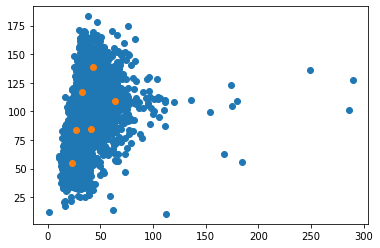

In [8]:
plt.figure()
plt.scatter(boxes[...,0], boxes[...,1])
plt.scatter(cluster_list[...,0], cluster_list[...,1])
plt.show()

In [9]:
cluster_alg = KMeans(6)
cluster_alg.fit(boxes)
cluster_alg.cluster_centers_

array([[ 35.67640623, 113.95739749],
       [ 27.58001277,  52.87232524],
       [199.55368978, 102.7524872 ],
       [ 31.65288024,  84.00646327],
       [ 43.41693508, 143.12553836],
       [ 67.977548  , 102.63865246]])

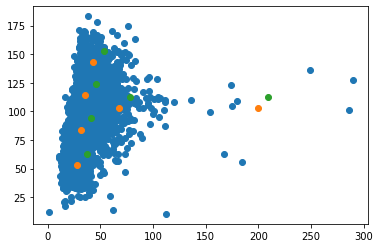

In [10]:
plt.figure()
plt.scatter(boxes[...,0], boxes[...,1])
plt.scatter(cluster_alg.cluster_centers_[...,0], cluster_alg.cluster_centers_[...,1])
plt.scatter(cluster_alg.cluster_centers_[...,0]+10, cluster_alg.cluster_centers_[...,1]+10)
plt.show()